In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [2]:
data = pd.read_csv('Fraud_check.csv')

In [3]:
data['IncomeCategory'] = np.where(data['Taxable.Income'] <= 30000, 'Risky', 'Good')

In [4]:
# Drop the original Taxable.Income column
data.drop(columns=['Taxable.Income'], inplace=True)

In [5]:
# c Perform EDA
# Start with basic statistics and visualizations
print(data.describe())

       City.Population  Work.Experience
count       600.000000       600.000000
mean     108747.368333        15.558333
std       49850.075134         8.842147
min       25779.000000         0.000000
25%       66966.750000         8.000000
50%      106493.500000        15.000000
75%      150114.250000        24.000000
max      199778.000000        30.000000


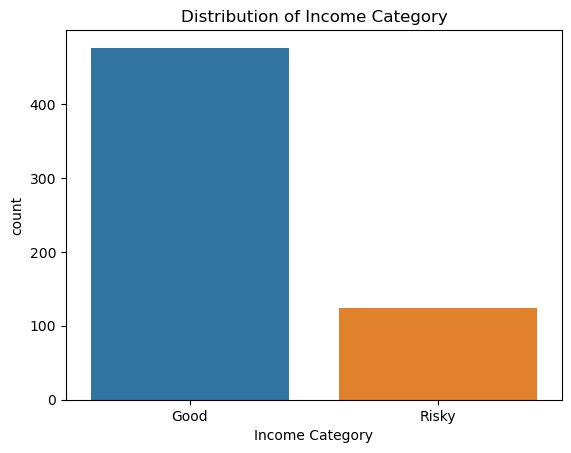

In [6]:
# Visualize the distribution of the target variable "IncomeCategory"
sns.countplot(data=data, x='IncomeCategory')
plt.xlabel('Income Category')
plt.title('Distribution of Income Category')
plt.show()

In [7]:
# Convert categorical variables into numerical using one-hot encoding
data = pd.get_dummies(data, columns=['Undergrad', 'Marital.Status', 'Urban'], drop_first=True)

In [8]:
 Split the data into training and testing sets
X = data.drop(columns=['IncomeCategory'])
y = data['IncomeCategory']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


SyntaxError: invalid syntax (3003266262.py, line 1)

In [9]:
 ###Split the data into training and testing sets
X = data.drop(columns=['IncomeCategory'])
y = data['IncomeCategory']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [10]:
# Step  Train a Random Forest model
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

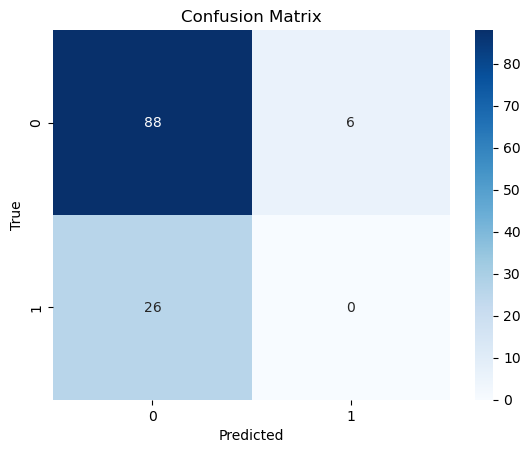

In [11]:
# Confusion matrix
y_pred = rf_classifier.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [12]:
# Classification report
class_report = classification_report(y_test, y_pred)
print(class_report)

              precision    recall  f1-score   support

        Good       0.77      0.94      0.85        94
       Risky       0.00      0.00      0.00        26

    accuracy                           0.73       120
   macro avg       0.39      0.47      0.42       120
weighted avg       0.60      0.73      0.66       120



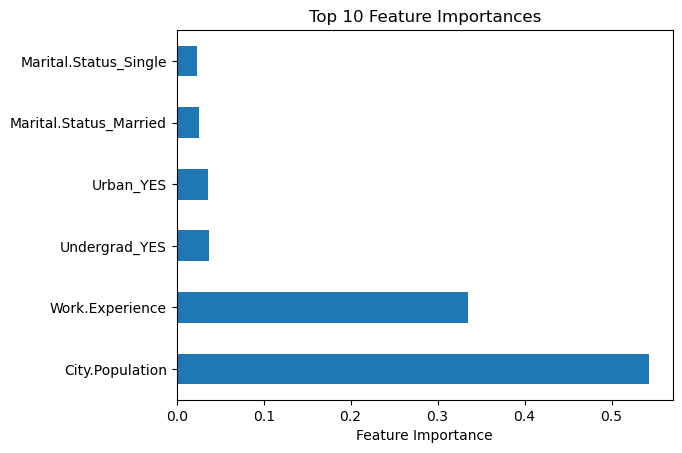

In [13]:
# You can also visualize feature importances if needed
feat_importances = pd.Series(rf_classifier.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.xlabel('Feature Importance')
plt.title('Top 10 Feature Importances')
plt.show()